In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
import numpy as np
import statsmodels.api as sm
import pylab

In [2]:
df = pd.read_csv('20k_playlists.csv')

In [54]:
stats.shapiro(df.diversity_ratio.sample(500))

ShapiroResult(statistic=0.972589910030365, pvalue=4.6479851079084256e-08)

In [ ]:
#p_value less than 0.05, cannot assume the data is normally distributed. 

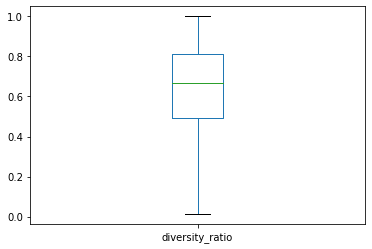

In [22]:
df.diversity_ratio.plot(kind='box')

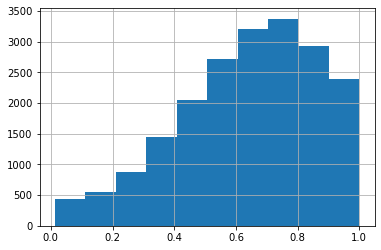

In [23]:
df.diversity_ratio.hist()

## Based on Shapiro Wilk test, box plot and historgram visualizations, we cannot assume that diversity_ratio nor num_followers is normally distributed. 

In [151]:
stats.shapiro(df.num_followers.sample(500))

ShapiroResult(statistic=0.42116695642471313, pvalue=4.2296537250340386e-37)

In [4]:
df.corr()

,pid,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,diversity_ratio
pid,1.000000,0.001648,0.004593,0.003351,-0.002237,-0.000257,0.002566,0.004918,-0.008035
collaborative,0.001648,1.000000,0.020070,0.027601,0.036204,0.029246,-0.001766,0.017065,0.031225
duration_ms,0.004593,0.020070,1.000000,0.892883,0.805262,0.601488,-0.001288,0.985038,-0.388490
num_albums,0.003351,0.027601,0.892883,1.000000,0.954827,0.670223,-0.000484,0.901493,-0.110367
num_artists,-0.002237,0.036204,0.805262,0.954827,1.000000,0.661720,0.000307,0.818935,0.067262
num_edits,-0.000257,0.029246,0.601488,0.670223,0.661720,1.000000,0.000100,0.604215,-0.052360
num_followers,0.002566,-0.001766,-0.001288,-0.000484,0.000307,0.000100,1.000000,-0.000952,0.000648
num_tracks,0.004918,0.017065,0.985038,0.901493,0.818935,0.604215,-0.000952,1.000000,-0.389533
diversity_ratio,-0.008035,0.031225,-0.388490,-0.110367,0.067262,-0.052360,0.000648,-0.389533,1.000000


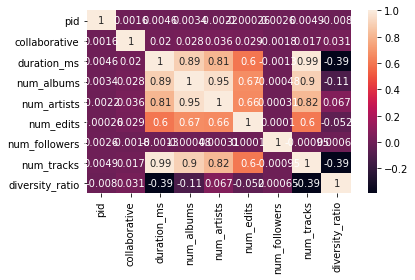

In [122]:
sn.heatmap(df.corr(), annot=True)
plt.tight_layout()

### planning: 
- null hypothesis: Playlist diversity ratio has no effect on number of followers
- can compare the diference between the "high follower" set and the "low follower" set to see if diversity ratio influences follower count
- t-test to see if you can confidently reject the null-hypothesis

In [12]:
less_than = df[df['num_followers'] < 10]
less_than

,pid,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,diversity_ratio
0,0,False,11532414,47,37,6,1,52,0.711538
1,1,False,11656470,23,21,5,1,39,0.538462
2,2,False,14039958,51,31,18,1,64,0.484375
3,3,False,28926058,107,86,4,1,126,0.682540
4,4,False,4335282,16,16,7,2,17,0.941176
...,...,...,...,...,...,...,...,...,...
19995,115995,False,8983567,32,25,11,1,39,0.641026
19996,115996,True,5660735,19,17,16,1,20,0.850000
19997,115997,False,3765841,12,9,8,1,14,0.642857
19998,115998,False,8322008,32,31,8,1,35,0.885714


In [13]:
greater_equal = df[df['num_followers'] >= 10]
greater_equal

,pid,collaborative,duration_ms,num_albums,num_artists,num_edits,num_followers,num_tracks,diversity_ratio
223,223,False,29870133,106,76,37,10,120,0.633333
241,241,False,29003627,25,7,17,18,151,0.046358
255,255,False,6772221,28,25,3,22,32,0.781250
296,296,False,8320641,31,26,19,11,35,0.742857
365,365,False,29409896,114,90,18,15,128,0.703125
...,...,...,...,...,...,...,...,...,...
19594,115594,False,5896162,27,11,7,21,32,0.343750
19638,115638,False,15728788,35,15,5,13,65,0.230769
19825,115825,False,4531957,19,17,2,27,24,0.708333
19833,115833,False,25607715,79,53,47,13,115,0.460870


In [30]:
less_than_mean = less_than.diversity_ratio.mean()
less_than_mean

0.6396541269386848

In [31]:
greater_equal_mean = greater_equal.diversity_ratio.mean()
greater_equal_mean

0.6238787506983645

In [32]:
less_than_std = less_than.diversity_ratio.std()
less_than_std

0.22686081949319425

In [33]:
greater_equal_std = greater_equal.diversity_ratio.std()
greater_equal_std

0.24043472932460513

In [31]:
less_than_norm = stats.norm(less_than_mean, less_than_std)
greater_equal_norm = stats.norm(greater_equal_mean, greater_equal_std)

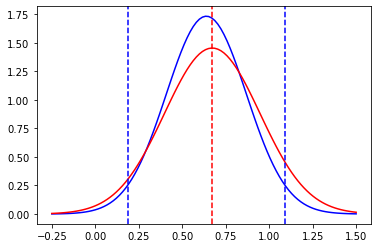

In [33]:
left_tail = less_than_norm.ppf(.025)
right_tail = less_than_norm.ppf(.975)


fig, ax = plt.subplots()
x = np.linspace(-0.25,1.5,100)
ax.plot(x, less_than_norm.pdf(x), color='blue')
ax.plot(x, greater_equal_norm.pdf(x), color='red')
ax.axvline(left_tail, color='blue', linestyle = 'dashed')
ax.axvline(right_tail, color='blue', linestyle='dashed')
ax.axvline(greater_equal_mean, color='red', linestyle='dashed')

#### run scipy.stats t-test to get p-value that backs up rejecting the null hypothesis
#### check to see if the diversity_ratio is normally distributed?? If no, bootstrapping for CLT sampling means

## Data is not normally distributed. Moving into bootstrapping: 

In [60]:
# def bootstrap(data, num_samps=1000):
#     boot_samp_list = []
    
#     for i in range(num_samps):
#         boot_samp_list.append(data.sample(len(data), replace=True))
        
#     return boot_samp_list

In [107]:
def bootstrap(data, num_samps=1000):
    
#     for i in range(num_samps):
#         boot_samp_list.append(data.sample(frac=1, replace=True))
        
    return [data.sample(len(data), replace=True) for i in range(num_samps)]

In [73]:
def bootstrap_ci(boot_samp_list, ci=95):
    boot_strap_means = []
    
    for samp in boot_samp_list:
        boot_strap_means.append(np.mean(samp))
        
    left_endpoint = np.percentile(boot_strap_means, (100-ci)/2)
    right_endpoint = np.percentile(boot_strap_means, 100-((100-ci)/2))
    
    return left_endpoint, right_endpoint

In [116]:
bootstrap_ci(bootstrap(less_than.diversity_ratio))

(0.6365999455730497, 0.6425759730203948)

In [150]:
less_sample_strap_list = np.array(bootstrap(less_than.diversity_ratio, 1000))

less_mean_list = less_sample_strap_list.mean(axis=1) 

In [145]:
less_mean_list.mean()

0.6397169959515749

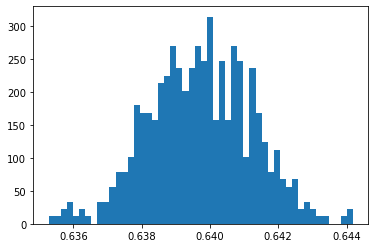

In [146]:
fig, ax = plt.subplots()
ax.hist(less_mean_list, bins=50, density=True)
plt.show()

In [147]:
greater_sample_strap_list = np.array(bootstrap(greater_equal.diversity_ratio, 10000))

greater_mean_list = greater_sample_strap_list.mean(axis=1) 

In [148]:
greater_mean_list.mean()
#falls outside of left-tail confidence interval of less_than distribution

0.6241598477744329

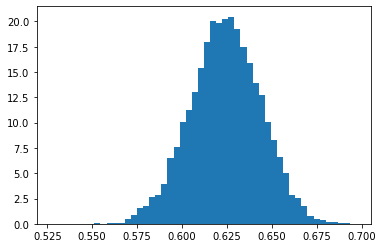

In [149]:
fig, ax = plt.subplots()
ax.hist(greater_mean_list, bins=50, density=True)
plt.show()

In [137]:
#running t test to confirm that we can reject the null hypothesis
stats.ttest_ind(less_mean_list, greater_mean_list)

Ttest_indResult(statistic=25.87566351212067, pvalue=3.7906405160890515e-147)

In [138]:
#unexpected: p-value less than 0.05, reject the null hypothesis!

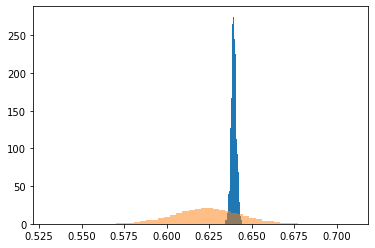

In [139]:
#trying to lay the two graphs over top one another: 
fig, ax = plt.subplots()
ax.hist(less_mean_list, bins=50, density=True)
ax.hist(greater_mean_list, bins=50, density=True, alpha=0.5)
plt.show()

In [ ]:
# #next steps 
# - adjust bootstrapping to try and bring sample sizes in line with one another??
# - repeating this test with one or more different factors?
#     - collaborative and diversity_ratio
#     - num_tracks and follower count?

# look at using bayes to make a beta distribution

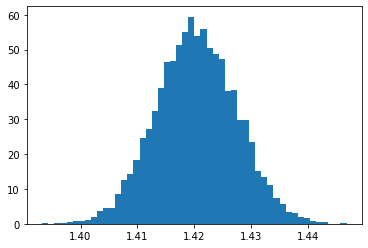

In [112]:
##plotting of the wrong variable: num_followers

# # less_boot_strap_means = []

# # for samp in np.array(bootstrap(less_than.num_followers, 10000)):
# #     less_boot_strap_means.append(samp.mean())
    
# fig, ax = plt.subplots()
# ax.hist(less_mean_list, bins=50, density=True)
# plt.show()

# # note the y-axis

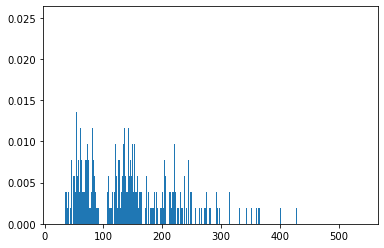

In [114]:
fig, ax = plt.subplots()
ax.hist(greater_mean_list, bins=10000, density=True)
plt.show()